Text(0, 0.5, 'Loss')

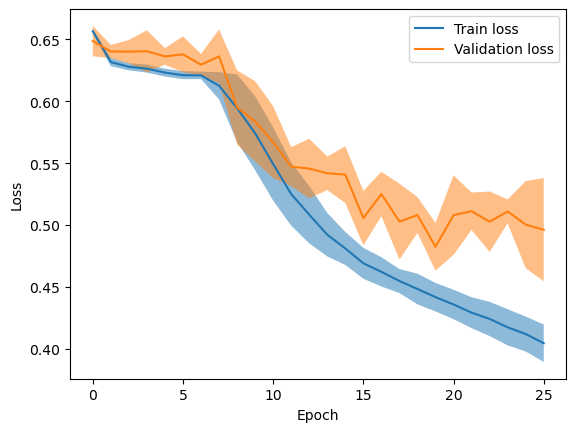

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

training_files  = ["mamba_out/split_" + str(i) + "/training_log.csv" for i in range(1, 6)]

dfs = [pd.read_csv(f) for f in training_files]

train_losses = [df['train_loss'].to_numpy() for df in dfs]
val_losses = [df['val_loss'] for df in dfs]
indexes = [len(df.index) for df in dfs]
length = min(indexes)

train_losses = [loss[:length] for loss in train_losses]
val_losses = [loss[:length] for loss in val_losses]

train_loss_mean = np.mean(train_losses, axis=0)
val_loss_mean = np.mean(val_losses, axis=0)
train_loss_std = np.std(train_losses, axis=0)
val_loss_std = np.std(val_losses, axis=0)

plt.figure()
plt.plot(range(len(train_loss_mean)), train_loss_mean, label='Train loss')
plt.fill_between(range(len(train_loss_mean)), train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, alpha=0.5)
plt.plot(range(len(val_loss_mean)), val_loss_mean, label='Validation loss')
plt.fill_between(range(len(val_loss_mean)), val_loss_mean - val_loss_std, val_loss_mean + val_loss_std, alpha=0.5)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')